In [ ]:
from csv import reader
import pandas as pd
import ast

In [ ]:
test = pd.read_csv('http://sybmo.com/thesis/test.csv')
test.tokens = test.tokens.apply(ast.literal_eval)
test.labels = test.labels.apply(ast.literal_eval)
test.labels = test.labels.astype(str).str.replace("2", "1").apply(ast.literal_eval)


final_list_tokens = []
final_list_labels = []
!wget 'http://sybmo.com/thesis/distil-binary.csv'

with open("distil-binary.csv", "r") as read_obj:
    csv_reader = reader(read_obj)
    # iterate over each row in the csv using reader object
    breaki = 0
    for row in csv_reader:
        # declare emtpy lists for every row
        words = []
        labels = []
        # row variable is a list that represents a row in csv
        for element in row:
            # turn string representation of tuple into real tuple
            element = ast.literal_eval(str(element))
            # append every first element of tuple to words list
            words.append(element[0])

            # check if words start with bracket or double hashtag in order to only keep the right labels
            if not (element[0].startswith("[C") or element[0].startswith("##") or element[0].startswith("[S") ):
                labels.append(element[1])

        #remove "tokens" that start with bracket ([CLS] and [SEP] (but keep [UNK]))
        text = ' '.join([x for x in words if not (x.startswith('[C') or x.startswith('[S'))])
        clean_text = text.replace(' ##', '')


        split_fine_text = clean_text.split()

        # this piece of code finds emojis and removes them from the list
        # and removes the labels at given index
        for index, token in enumerate(split_fine_text):
            encoded_token = token.encode('utf8')
            if 'xf' in str(encoded_token):
                split_fine_text.pop(index)
                labels.pop(index)

        final_list_tokens.append(split_fine_text)
        final_list_labels.append([int(x[-1]) for x in labels])

# flatten the lists
preds = [item for sublist in final_list_labels for item in sublist]
gold = [item for sublist in test.labels.to_list() for item in sublist]
tokens_gold = [item for sublist in test.tokens.to_list() for item in sublist]
reconstructed_flat = [item for sublist in final_list_tokens for item in sublist]

--2023-03-05 04:30:39--  http://sybmo.com/thesis/distil-binary.csv
Resolving sybmo.com (sybmo.com)... 81.169.145.82, 2a01:238:20a:202:1082::
Connecting to sybmo.com (sybmo.com)|81.169.145.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399995 (391K) [text/csv]
Saving to: ‘distil-binary.csv’

distil-binary.csv   100%[===================>] 390.62K   426KB/s    in 0.9s    

2023-03-05 04:30:40 (426 KB/s) - ‘distil-binary.csv’ saved [399995/399995]



In [ ]:
for index,token in enumerate(tokens_gold):
    if token == "\u200d":
        gold.pop(index)
        tokens_gold.pop(index)

print(len(tokens_gold),len(reconstructed_flat),len(gold),len(preds))

14205 14205 14205 14205


In [ ]:
error_tokens = []
for index, token in enumerate(tokens_gold):
    if preds[index] != gold[index]:
        error_tokens.append(token)

In [ ]:
error_tokens

['ass',
 'loser',
 'bullshit',
 'ghetto',
 'mafia',
 'pond',
 'people',
 'illegal',
 'women',
 'fucking',
 'white',
 'people',
 'dumb',
 'ass',
 'rats',
 'wetback',
 'twerkin',
 'blunts',
 'lambo',
 'trash',
 'women',
 'hillary',
 'clinton',
 'woman',
 'fucking',
 'refugees',
 'men',
 'american',
 'insult',
 'cancer',
 'women',
 'vile',
 'ass',
 'dumber',
 'retarded',
 'tree',
 'snail',
 'she',
 'begginner',
 'he',
 'you',
 'your',
 'they',
 'you',
 'fucking',
 'stan',
 'pretty',
 'retarded',
 '<number>',
 'gangs',
 'men',
 'women',
 'they',
 'they',
 'retarded',
 'he',
 'halsey',
 'women',
 'you',
 'you',
 'u',
 'you',
 'gay',
 'catch',
 'bloody',
 'this',
 'anti',
 'antifs',
 'you',
 'mannequin',
 'they',
 'they',
 'carpet',
 'kissers',
 'they',
 'racist',
 'american',
 'extreme',
 'sexy',
 'friends',
 'kennedy',
 'jack',
 'mark',
 'tom',
 'dick',
 'sumbitch',
 'this',
 'this',
 'youre',
 'community',
 'mgtow',
 'these',
 'brzen',
 'they',
 'miss',
 'lindsey',
 'miss',
 'lindsey',
 '

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-postagger-full-2017-06-09.zip'

--2023-03-05 04:30:41--  https://nlp.stanford.edu/software/stanford-postagger-full-2017-06-09.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-postagger-full-2017-06-09.zip [following]
--2023-03-05 04:30:41--  https://downloads.cs.stanford.edu/nlp/software/stanford-postagger-full-2017-06-09.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134295971 (128M) [application/zip]
Saving to: ‘stanford-postagger-full-2017-06-09.zip’

stanford-postagger- 100%[===================>] 128.07M  5.13MB/s    in 21s     

2023-03-05 04:31:02 (6.05 MB/s) - ‘stanford-postagger-full-2017-06-09.zip’ saved [1

In [ ]:
!ls

distil-binary.csv  sample_data	stanford-postagger-full-2017-06-09.zip


In [ ]:

pos_tags = nltk.pos_tag(error_tokens)
pos_tags = [i[1] for i in pos_tags]
print(len(error_tokens))

NameError: ignored

In [ ]:


testje = pd.Series(pos_tags).value_counts(normalize=True).round(3)
testje2 = pd.Series(pos_tags).value_counts().astype(int)

dataframepje = pd.DataFrame([testje2,testje]).T
dataframepje[0] = dataframepje[0].astype(int)
print(dataframepje.to_latex())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(gold, preds,output_dict=True)

df = pd.DataFrame(report).transpose()

df.to_latex()

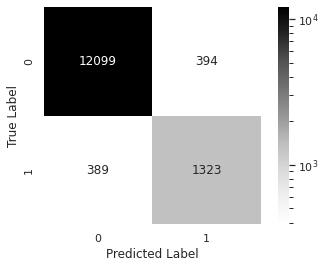

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='white')
from matplotlib.colors import LogNorm, Normalize

cm = metrics.confusion_matrix(gold, preds, labels=[0,1])
# plt.title("distilBERT_3epoch", fontsize =20)
sns.heatmap(cm, annot=True,fmt='d',square=True, norm=LogNorm(),cmap = "Greys").set(xlabel='Predicted Label', ylabel='True Label');
plt.savefig('binaryyy.pdf',dpi=300)
plt.show()

In [ ]:
for index, token in enumerate(reconstructed_flat):
    if token != tokens_gold[index]:
        print(index,tokens_gold[index], token, gold[index], preds[index])

In [ ]:
zipped_list_labels = []

for sent_index,sentence in enumerate(final_list_tokens):
    sent_list = []
    for token_index, token in enumerate(sentence):
        sent_list.append((token, final_list_labels[sent_index][token_index]))
    zipped_list_labels.append(sent_list)

import csv
with open("/drive/My Drive/thesis_sybren/BERTs/DistilBERT/reconstructed_preds_distilBERT-binary.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zipped_list_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score       support
0              0.879479  1.000000  0.935875  12493.000000
1              0.000000  0.000000  0.000000   1712.000000
accuracy       0.879479  0.879479  0.879479      0.879479
macro avg      0.439740  0.500000  0.467938  14205.000000
weighted avg   0.773483  0.879479  0.823083  14205.000000


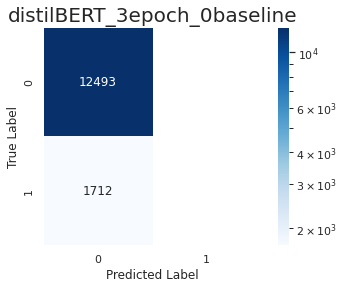

In [ ]:
baseline = [0] * len(gold)


report = classification_report(gold, baseline, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)


cm = metrics.confusion_matrix(gold, baseline, labels=[0,1])
plt.title("distilBERT_3epoch_0baseline", fontsize =20)
sns.heatmap(cm, annot=True,fmt='d',square=True, norm=LogNorm(),cmap = "Blues").set(xlabel='Predicted Label', ylabel='True Label');

plt.show()

              precision    recall  f1-score       support
0              0.968850  0.968462  0.968656  12493.000000
1              0.770530  0.772780  0.771654   1712.000000
accuracy       0.944879  0.944879  0.944879      0.944879
macro avg      0.869690  0.870621  0.870155  14205.000000
weighted avg   0.944948  0.944879  0.944913  14205.000000

              precision    recall  f1-score       support
0              0.968850  0.968462  0.968656  12493.000000
1              0.770530  0.772780  0.771654   1712.000000
accuracy       0.944879  0.944879  0.944879      0.944879
macro avg      0.869690  0.870621  0.870155  14205.000000
weighted avg   0.944948  0.944879  0.944913  14205.000000


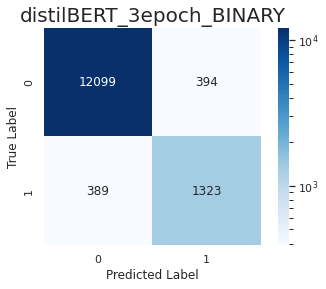

In [ ]:
gold_binary = [1 if i==2 else i for i in gold]
preds_binary = [1 if i==2 else i for i in preds]

report = classification_report(gold_binary, preds_binary, output_dict=True)
df_je = pd.DataFrame(report).transpose()
print(df_je)
print()
report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)


cm = metrics.confusion_matrix(gold_binary, preds_binary, labels=[0,1])
plt.title("distilBERT_3epoch_BINARY", fontsize =20)
sns.heatmap(cm, annot=True,fmt='d',square=True, norm=LogNorm(),cmap = "Blues").set(xlabel='Predicted Label', ylabel='True Label');

plt.show()

In [ ]:
for index, label in enumerate(gold):
    if label == 2:
        gold[index] = 1

In [ ]:
report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)

              precision    recall  f1-score       support
0              0.968850  0.968462  0.968656  12493.000000
1              0.770530  0.772780  0.771654   1712.000000
accuracy       0.944879  0.944879  0.944879      0.944879
macro avg      0.869690  0.870621  0.870155  14205.000000
weighted avg   0.944948  0.944879  0.944913  14205.000000


In [ ]:
test.labels.tolist()[0]

[0, 0, 1, 0, 1, 0]

In [ ]:
final_list_labels[0]

[0, 0, 1, 1, 1, 0]

In [ ]:
gold = 2
pred = 1
gold2_pred1 = []

for sent_index_labels,list_of_gold_labels in enumerate(test.labels.to_list()):
    # print(sent_index_labels)
    if test.labels.to_list()[sent_index_labels] != final_list_labels[sent_index_labels]:
        for token_index, token in enumerate(final_list_labels[sent_index_labels]):
            if (token == pred and test.labels.to_list()[sent_index_labels][token_index]==gold):
                #print(test.tokens.iloc[sent_index_labels])
                #print(f'gold: {list(zip(test.tokens.to_list()[sent_index_labels], test.labels.to_list()[sent_index_labels]))}')
                #print(f'preds: {list(zip(test.tokens.to_list()[sent_index_labels],final_list_labels[sent_index_labels]))}')
            # print(f'gold:  {test.labels.to_list()[sent_index_labels]} ')
                # print(f'pred:  {final_list_labels[sent_index_labels]}')
                gold2_pred1.append(sent_index_labels)
    # if list_of_gold_labels != final_list_labels[sent_index_labels]:
    #     print(final_list_tokens[sent_index])

len(gold2_pred1)

0

In [ ]:
gold = 1
pred = 2
gold1_pred2 = []

for sent_index_labels,list_of_gold_labels in enumerate(test.labels.to_list()):
    # print(sent_index_labels)
    if test.labels.to_list()[sent_index_labels] != final_list_labels[sent_index_labels]:
        for token_index, token in enumerate(final_list_labels[sent_index_labels]):
            if (token == pred and test.labels.to_list()[sent_index_labels][token_index]==gold):
                #print(test.tokens.iloc[sent_index_labels])
                #print(f'gold: {list(zip(test.tokens.to_list()[sent_index_labels], test.labels.to_list()[sent_index_labels]))}')
                #print(f'preds: {list(zip(test.tokens.to_list()[sent_index_labels],final_list_labels[sent_index_labels]))}')
            # print(f'gold:  {test.labels.to_list()[sent_index_labels]} ')
                # print(f'pred:  {final_list_labels[sent_index_labels]}')
                gold1_pred2.append(sent_index_labels)
    # if list_of_gold_labels != final_list_labels[sent_index_labels]:
    #     print(final_list_tokens[sent_index])

len(gold1_pred2)

0

TypeError: ignored